In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sb.set() # set the default Seaborn style for graphics
from datetime import datetime

In [17]:
musicdata = pd.read_csv("SpotifyMusic.csv")
musicdata

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022-02-17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022-02-17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022-02-17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022-02-17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022-02-17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020-06-22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020-06-22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020-06-22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020-08-20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [18]:
musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


# Data Cleaning

In [19]:
C_musicdata = musicdata.copy()
C_musicdata['added'] = pd.to_datetime(C_musicdata.added)
C_musicdata = C_musicdata[['top genre','bpm','nrgy','dnce','val','dur','acous','pop','artist type']]
C_musicdata

,top genre,bpm,nrgy,dnce,val,dur,acous,pop,artist type
0,dance pop,140,81,61,23,203,0,70,Duo
1,dance pop,138,89,68,83,192,1,68,Duo
2,pop soul,95,48,84,96,243,20,72,Solo
3,atl hip hop,93,87,66,38,180,11,80,Solo
4,atl hip hop,104,85,69,74,268,39,79,Solo
...,...,...,...,...,...,...,...,...,...
995,hip hop,155,73,83,45,313,1,86,Solo
996,hip hop,80,50,55,41,190,23,85,Solo
997,grime,103,77,89,46,177,1,68,Solo
998,afroswing,138,58,53,59,214,1,67,Duo


# Joint Comparison of Popularity and Danceability

In [20]:
#Extracting the 2 variables from dataset

danceability = pd.DataFrame(musicdata['dnce'])
popularity = pd.DataFrame(musicdata['pop'])



In [21]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([danceability, popularity], axis = 1).reindex(danceability.index)
jointDF

,dnce,pop
0,61,70
1,68,68
2,84,72
3,66,80
4,69,79
...,...,...
995,83,86
996,55,85
997,89,68
998,53,67


ValueError: Could not interpret value `Danceability` for parameter `x`

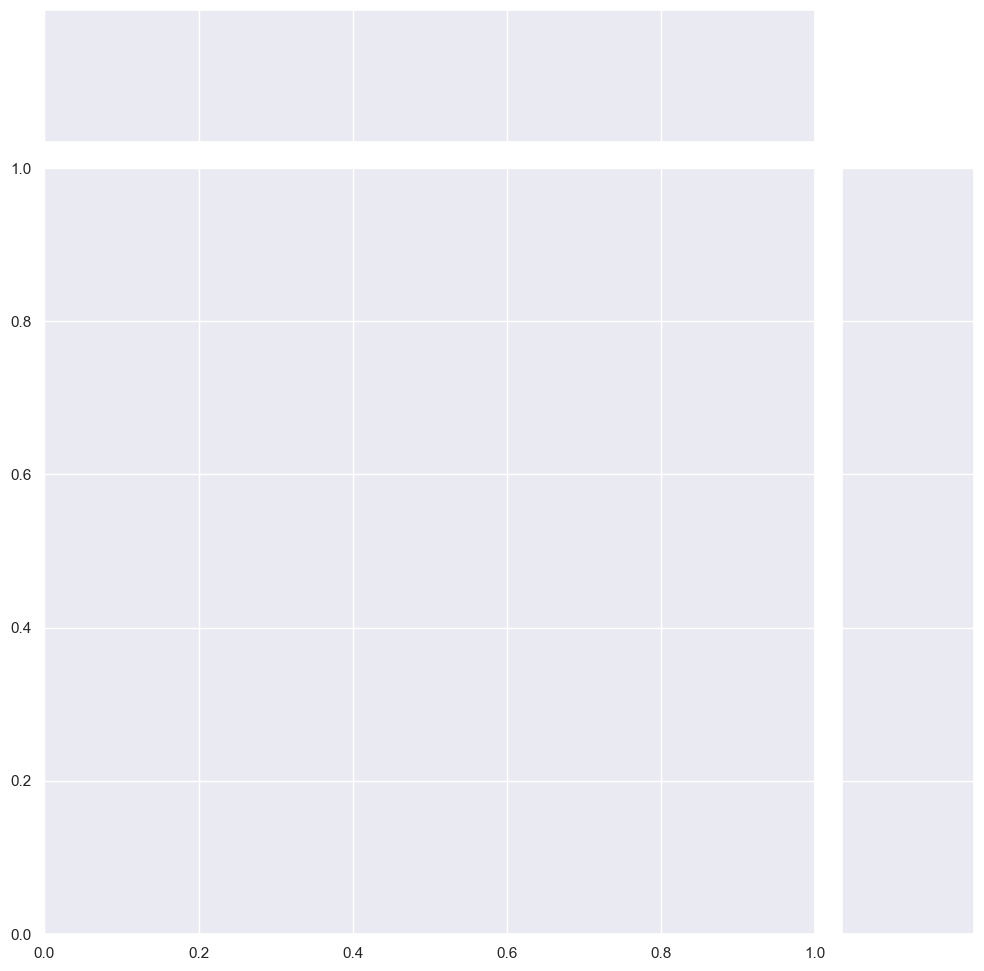

In [22]:
# Draw jointplot of the two variables in the joined dataframe ?? how do i fix this
sb.jointplot(data = jointDF, x = "Danceability", y = "Popularity", height = 12)

# Correlation between popularity and danceability

In [ ]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,dnce,pop
dnce,1.000000,0.093176
pop,0.093176,1.000000


# Visualizing the two variables through a heatmap

<AxesSubplot:>

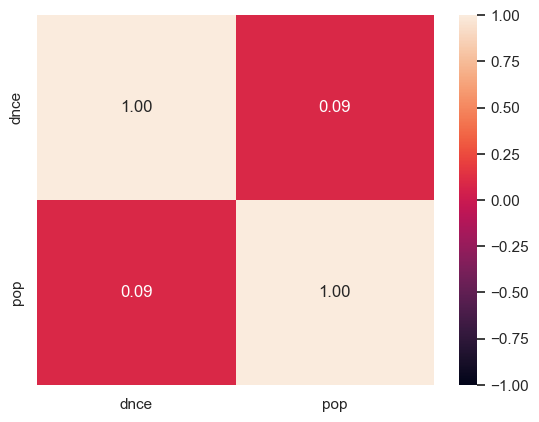

In [ ]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")